In [24]:
import pandas as pd

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

In [11]:
df = pd.read_csv('dataset/NBA-playerlist.csv')
df.head()

,Unnamed: 0,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,FROM_YEAR,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH,PERSON_ID,PLAYERCODE,ROSTERSTATUS,TEAM_ABBREVIATION,TEAM_CITY,TEAM_CODE,TEAM_ID,TEAM_NAME,TO_YEAR
0,0,Alaa Abdelnaby,"Abdelnaby, Alaa",1990,Y,0,76001,HISTADD_alaa_abdelnaby,0,NaN,NaN,NaN,0,NaN,1994
1,1,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",1968,Y,0,76002,HISTADD_zaid_abdul-aziz,0,NaN,NaN,NaN,0,NaN,1977
2,2,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",1969,Y,0,76003,HISTADD_kareem_abdul-jabbar,0,NaN,NaN,NaN,0,NaN,1988
3,3,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",1990,Y,0,51,mahmoud_abdul-rauf,0,NaN,NaN,NaN,0,NaN,2000
4,4,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",1997,Y,0,1505,tariq_abdul-wahad,0,NaN,NaN,NaN,0,NaN,2003


## Understanding Data

In [12]:
# When does this dataset begin and this dataset end
df.describe()

,Unnamed: 0,FROM_YEAR,OTHERLEAGUE_EXPERIENCE_CH,PERSON_ID,ROSTERSTATUS,TEAM_ID,TO_YEAR
count,4393.000000,4393.000000,4393.000000,4.393000e+03,4393.000000,4.393000e+03,4393.000000
mean,2196.000000,1986.362850,0.571591,2.045851e+05,0.102891,1.657175e+08,1990.656954
std,1268.294196,21.686097,2.062090,4.275564e+05,0.303851,4.893863e+08,22.487813
min,0.000000,1946.000000,0.000000,2.000000e+00,0.000000,0.000000e+00,1946.000000
25%,1098.000000,1971.000000,0.000000,2.798000e+03,0.000000,0.000000e+00,1975.000000
50%,2196.000000,1989.000000,0.000000,7.733400e+04,0.000000,0.000000e+00,1995.000000
75%,3294.000000,2005.000000,0.000000,1.011450e+05,0.000000,0.000000e+00,2011.000000
max,4392.000000,2018.000000,11.000000,1.629541e+06,1.000000,1.610613e+09,2018.000000


In [15]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.columns

Index(['DISPLAY_FIRST_LAST', 'DISPLAY_LAST_COMMA_FIRST', 'FROM_YEAR',
       'GAMES_PLAYED_FLAG', 'OTHERLEAGUE_EXPERIENCE_CH', 'PERSON_ID',
       'PLAYERCODE', 'ROSTERSTATUS', 'TEAM_ABBREVIATION', 'TEAM_CITY',
       'TEAM_CODE', 'TEAM_ID', 'TEAM_NAME', 'TO_YEAR'],
      dtype='object')

In [16]:
df.head()

,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,FROM_YEAR,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH,PERSON_ID,PLAYERCODE,ROSTERSTATUS,TEAM_ABBREVIATION,TEAM_CITY,TEAM_CODE,TEAM_ID,TEAM_NAME,TO_YEAR
0,Alaa Abdelnaby,"Abdelnaby, Alaa",1990,Y,0,76001,HISTADD_alaa_abdelnaby,0,NaN,NaN,NaN,0,NaN,1994
1,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",1968,Y,0,76002,HISTADD_zaid_abdul-aziz,0,NaN,NaN,NaN,0,NaN,1977
2,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",1969,Y,0,76003,HISTADD_kareem_abdul-jabbar,0,NaN,NaN,NaN,0,NaN,1988
3,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",1990,Y,0,51,mahmoud_abdul-rauf,0,NaN,NaN,NaN,0,NaN,2000
4,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",1997,Y,0,1505,tariq_abdul-wahad,0,NaN,NaN,NaN,0,NaN,2003


## Reducing Features

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DISPLAY_FIRST_LAST         4393 non-null   object
 1   DISPLAY_LAST_COMMA_FIRST   4393 non-null   object
 2   FROM_YEAR                  4393 non-null   int64 
 3   GAMES_PLAYED_FLAG          4393 non-null   object
 4   OTHERLEAGUE_EXPERIENCE_CH  4393 non-null   int64 
 5   PERSON_ID                  4393 non-null   int64 
 6   PLAYERCODE                 4392 non-null   object
 7   ROSTERSTATUS               4393 non-null   int64 
 8   TEAM_ABBREVIATION          452 non-null    object
 9   TEAM_CITY                  452 non-null    object
 10  TEAM_CODE                  452 non-null    object
 11  TEAM_ID                    4393 non-null   int64 
 12  TEAM_NAME                  452 non-null    object
 13  TO_YEAR                    4393 non-null   int64 
dtypes: int64

In [21]:
df["CAREER LENGTH"]=df["TO_YEAR"] - df["FROM_YEAR"]
df.head()

,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,FROM_YEAR,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH,PERSON_ID,PLAYERCODE,ROSTERSTATUS,TEAM_ABBREVIATION,TEAM_CITY,TEAM_CODE,TEAM_ID,TEAM_NAME,TO_YEAR,CAREER LENGTH
0,Alaa Abdelnaby,"Abdelnaby, Alaa",1990,Y,0,76001,HISTADD_alaa_abdelnaby,0,NaN,NaN,NaN,0,NaN,1994,4
1,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",1968,Y,0,76002,HISTADD_zaid_abdul-aziz,0,NaN,NaN,NaN,0,NaN,1977,9
2,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",1969,Y,0,76003,HISTADD_kareem_abdul-jabbar,0,NaN,NaN,NaN,0,NaN,1988,19
3,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",1990,Y,0,51,mahmoud_abdul-rauf,0,NaN,NaN,NaN,0,NaN,2000,10
4,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",1997,Y,0,1505,tariq_abdul-wahad,0,NaN,NaN,NaN,0,NaN,2003,6


In [22]:
# Getting first 50 folks
df.iloc[:50,:]

,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,FROM_YEAR,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH,PERSON_ID,PLAYERCODE,ROSTERSTATUS,TEAM_ABBREVIATION,TEAM_CITY,TEAM_CODE,TEAM_ID,TEAM_NAME,TO_YEAR,CAREER LENGTH
0,Alaa Abdelnaby,"Abdelnaby, Alaa",1990,Y,0,76001,HISTADD_alaa_abdelnaby,0,NaN,NaN,NaN,0,NaN,1994,4
1,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",1968,Y,0,76002,HISTADD_zaid_abdul-aziz,0,NaN,NaN,NaN,0,NaN,1977,9
2,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",1969,Y,0,76003,HISTADD_kareem_abdul-jabbar,0,NaN,NaN,NaN,0,NaN,1988,19
3,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",1990,Y,0,51,mahmoud_abdul-rauf,0,NaN,NaN,NaN,0,NaN,2000,10
4,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",1997,Y,0,1505,tariq_abdul-wahad,0,NaN,NaN,NaN,0,NaN,2003,6
5,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",1996,Y,0,949,shareef_abdur-rahim,0,NaN,NaN,NaN,0,NaN,2007,11
6,Tom Abernethy,"Abernethy, Tom",1976,Y,0,76005,HISTADD_tom_abernethy,0,NaN,NaN,NaN,0,NaN,1980,4
7,Forest Able,"Able, Forest",1956,Y,0,76006,HISTADD_frosty_able,0,NaN,NaN,NaN,0,NaN,1956,0
8,John Abramovic,"Abramovic, John",1946,Y,0,76007,HISTADD_brooms_abramovic,0,NaN,NaN,NaN,0,NaN,1947,1
9,Alex Abrines,"Abrines, Alex",2016,Y,0,203518,alex_abrines,0,NaN,NaN,NaN,0,NaN,2018,2


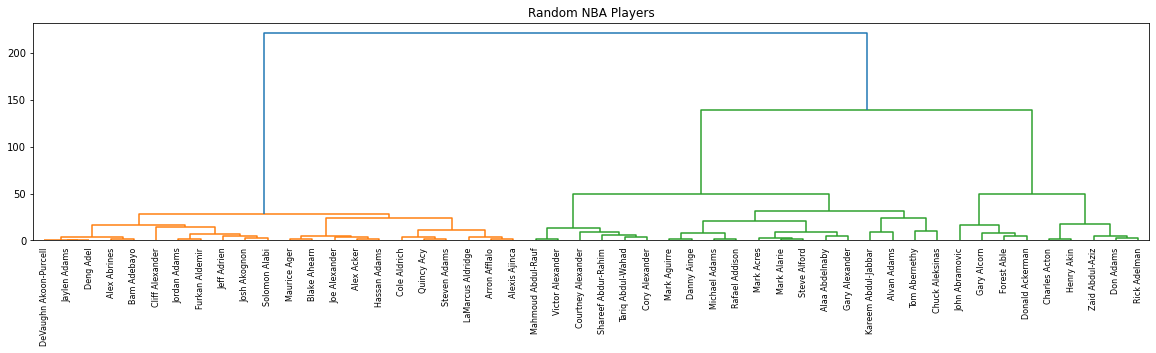

In [36]:
plt.figure(figsize=(20,4))
plt.title('Random NBA Players')
dend = dendrogram(linkage(df[['CAREER LENGTH','TO_YEAR','FROM_YEAR','OTHERLEAGUE_EXPERIENCE_CH']].iloc[:50,:],method='ward',
                          ),leaf_label_func=leaf_label_function)
plt.show()

In [33]:
def leaf_label_function(playerid):
    return df.iloc[playerid,0]

1. By default dendrogram plots the index on x-axis, thus we need to have a above function as a parameter for `leaf_label_func`.
2. We can't use any string valued columns for constructing dendrograms.